# Predict Housing Prices - Expensive or not

## Import Packages

In [1]:
import pandas as pd
# Helper
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.metrics import balanced_accuracy_score, precision_score, f1_score

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


## Import Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

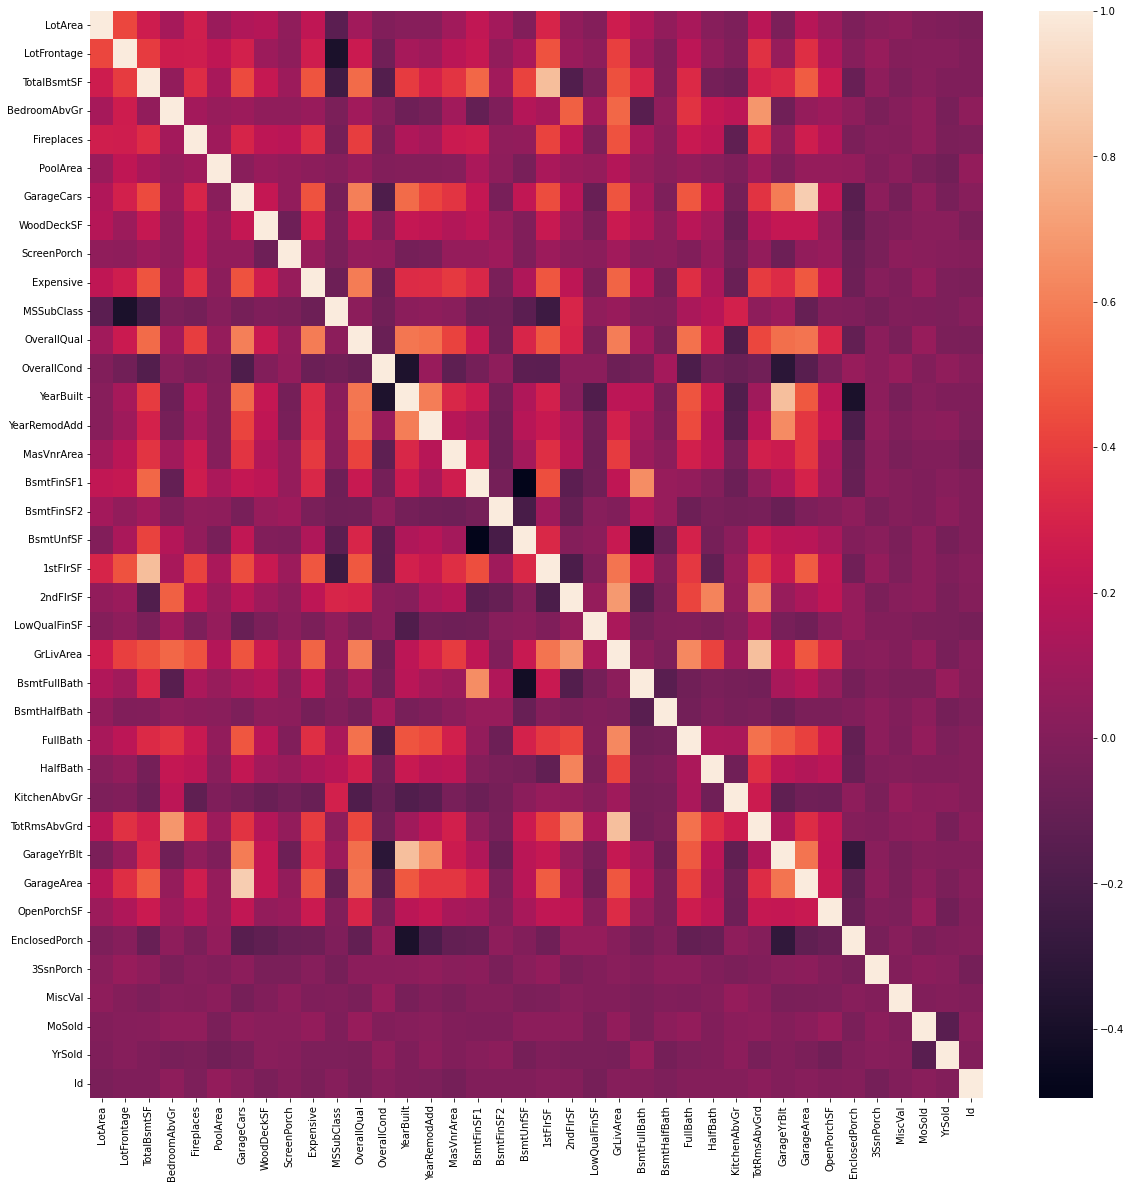

In [53]:
housing = pd.read_csv("../data/iter-6/housing.csv")
housing.info()

import seaborn as sn
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(housing.corr());


## Duplicated rows

In [3]:
housing.duplicated().sum()

0

## Split data function

In [25]:
def split_data(df):
    X = df.drop(columns="Expensive")
    y = df["Expensive"]
    # ordinal_features = ["Alley","LotShape","Utilities","LandSlope", "OverallQual","OverallCond","ExterQual", "ExterCond","Fence","PoolQC", "PavedDrive", "GarageCond", "GarageQual", "GarageFinish", "FireplaceQu", "KitchenQual", "HeatingQC", "BsmtExposure","BsmtCond", "BsmtQual"]
    #df = df.drop(columns=ordinal_features)
    numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.to_list()
    numerical_features.remove("Expensive")
    categorial_features = df.select_dtypes(exclude=["int64", "float64"]).columns.to_list()
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=50)
    
    return X_train, X_test, y_train, y_test, numerical_features, categorial_features

## Split Data

In [26]:
X_train, X_test, y_train, y_test, numerical_features, categorical_features = split_data(housing)

### Missing values

#### Culumns with missing values

In [54]:
na_columns = X_train.columns[X_train.isnull().any()].to_list()
housing[na_columns].isna().sum()

LotFrontage      259
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
FireplaceQu      690
MasVnrArea         8
GarageYrBlt       81
Alley           1369
MasVnrType         8
BsmtFinType2      38
Electrical         1
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## Pipeline

### Preprocessing

#### Numeric Pipe


In [28]:
numeric_pipe = make_pipeline(
    SimpleImputer(),
)

#### Categorical Pipe
*TODO:* 
- implement ordinal pipe

In [30]:

categorical_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(drop="first", sparse="False", handle_unknown="ignore")
)


In [31]:

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, numerical_features),
        ("cat_pipe", categorical_pipe, categorical_features)
    ]
)

### Full Pipeline

In [47]:
full_pipeline = Pipeline(steps= [
    ("preprocessor", preprocessor), 
    ("scaler", StandardScaler(with_mean=False)),
    ("model", RandomForestClassifier())
    ])
    


### Grid Search CV

In [ ]:
param_grid = [

    {   # Preprocessor
        "preprocessor__num_pipe__simpleimputer__strategy": ["median"],
        # Used Model
        "model": [RandomForestClassifier()],
        # Optimized
        'model__n_estimators': [1150],
        #'model__criterion':['gini'],
        'model__max_depth': [25],
        #'model__max_features': ["sqrt", "log2", "auto"],  
        'model__bootstrap': [False],
        'model__min_samples_leaf': [2],
        # Still to tune
        'model__min_samples_split': [2],

    },
   
]
search = GridSearchCV(
    full_pipeline,              # you have defined this beforehand
    param_grid,                 # your parameter grid
    cv=10,                       # the value for K in K-fold Cross Validation
    scoring=[
        'explained_variance'
        'max_error'
        'neg_mean_absolute_error'
        'neg_mean_squared_error'
        'neg_root_mean_squared_error'
        'neg_mean_squared_log_error'
        'neg_median_absolute_error'
        'r2'
        'neg_mean_poisson_deviance'
        'neg_mean_gamma_deviance'
        'neg_mean_absolute_percentage_error'
        ],
    verbose=1,                  # we want informative outputs during the training process
    refit="f1_weighted"
)


## Train model

Find best params with gridserachcv

In [ ]:
search_result = search.fit(X_train, y_train)
search_result.best_params_

### Inspect Search Results

In [49]:
columns_to_drop = [
    # "split0_test_score", 
    # "split1_test_score", 
    # "split2_test_score", 
    # "split3_test_score", 
    # "split4_test_score", 
    # "split5_test_score",
    # "split6_test_score",
    # "split7_test_score",
    # "split8_test_score",
    # "split9_test_score",
    "std_fit_time",
    "std_score_time",
    ]

cv_results = (
    pd.DataFrame(search_result.cv_results_)
    .sort_values("rank_test_f1_weighted")
    .drop(columns=columns_to_drop)
)
cv_results[[
    "mean_test_balanced_accuracy",
    "std_test_balanced_accuracy",
    "rank_test_balanced_accuracy",
    "mean_test_precision",
    "std_test_precision",
    "rank_test_f1_weighted",
    "mean_test_f1_weighted",
    "std_test_f1_weighted",
    "rank_test_f1_weighted",  
    ]]

,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_precision,std_test_precision,rank_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,0.5,0.0,1,0.0,0.0,1,0.789183,0.00481,1
1,0.5,0.0,1,0.0,0.0,1,0.789183,0.00481,1


### Check Results on **Test Data**

In [50]:
pred = search_result.predict(X_test)
acc = balanced_accuracy_score(pred, y_test)
prec = precision_score(pred, y_test)
f1_sc = f1_score(pred, y_test, average='weighted')

print("balanced accuracy:", acc)
print("Precision:", prec)
print("f1_score:", f1_sc)

balanced accuracy: 0.8383561643835616
Precision: 0.0
f1_score: 0.9120715350223547


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [1, 2, 25, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


### Run Pipeline with all data

In [46]:
X = housing.drop(columns="Expensive")
y = housing["Expensive"]
complete_search_result = search.fit(X,y)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [7, 25] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [9, 30, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [21, 27, 32] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:

### Run model with final Data

In [ ]:

final_data = pd.read_csv("../data/test.csv")
final_data["Expensive"] = complete_search_result.predict(final_data)



### Save Solution


In [38]:
solution = final_data[["Id", "Expensive"]]
solution.to_csv("../data/predictions/solution.csv",index=False)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0, 12, 17, 26, 27, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Compare Results

In [55]:
solution.sum()

Id           3195210
Expensive        183
dtype: int64

In [56]:
housing.Expensive.sum()

217